In [1]:
!cd ..

import matplotlib.pyplot as plt
import tensorflow as tf

from transformations import NativeAspectRatioResize, RandomCrop, RandomResizedCrop

/Users/gallo/Documents/uva/FoMo/uva-fomo/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


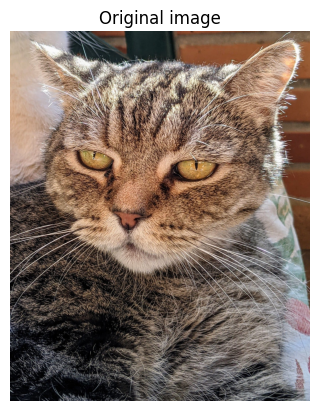

In [2]:
import numpy as np

original_image = plt.imread("demos/enrique.jpeg") / 255


def plot_image(image):
    # BiCubic interpolation can knock values outside of the [0, 1] range
    plt.imshow(np.clip(image, 0, 1))
    plt.axis("off")
    plt.show()


plt.title("Original image")
plot_image(original_image)

# NAR

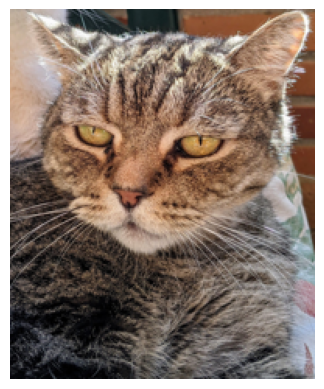

In [3]:
nar = NativeAspectRatioResize(square_size=224, patch_size=14)
plot_image(nar(original_image))

# Random Resized Crop /vs/ Random Crop + NAR

RandomResizedCrop reshapes the image so that it is square. Random Crop + NAR will preserve the aspect ratio **of the crop** (not the aspect ratio of the original image). 

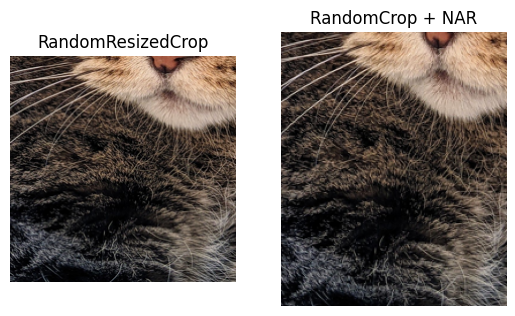

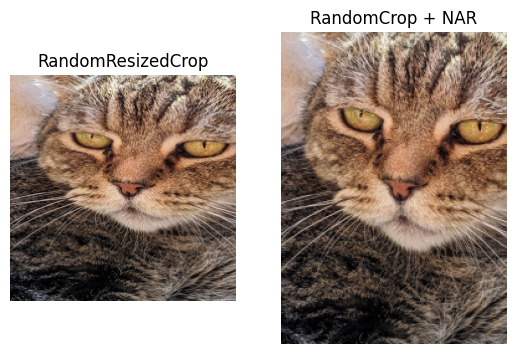

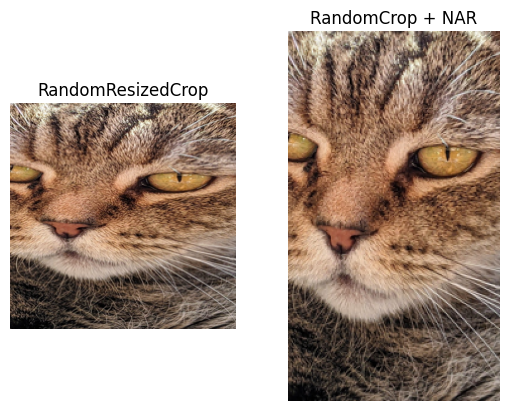

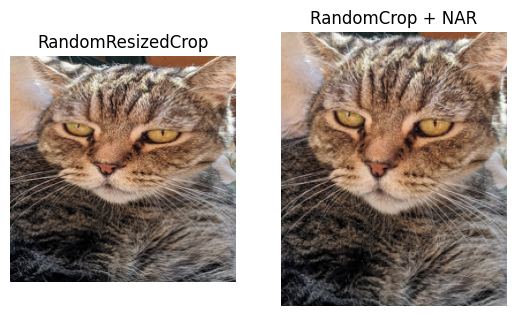

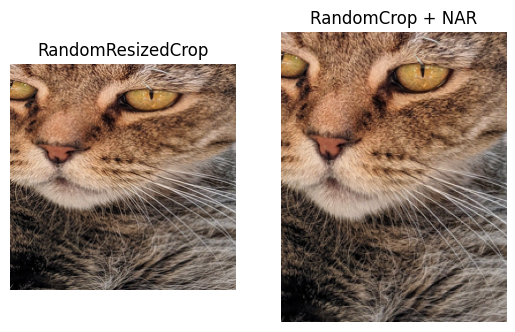

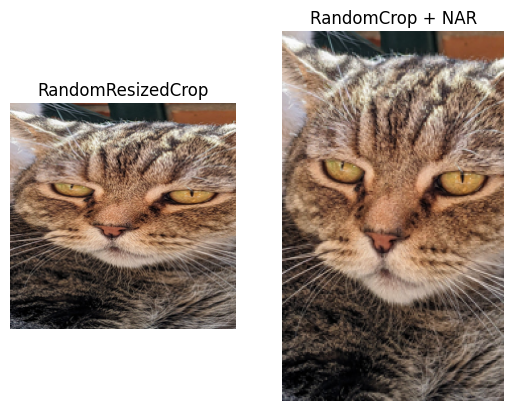

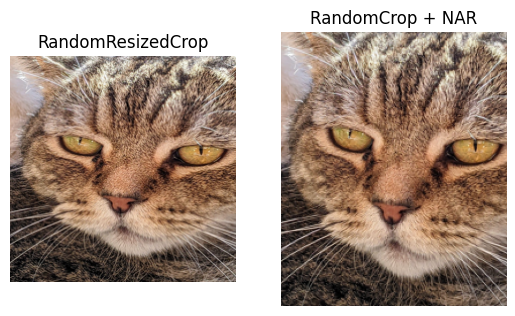

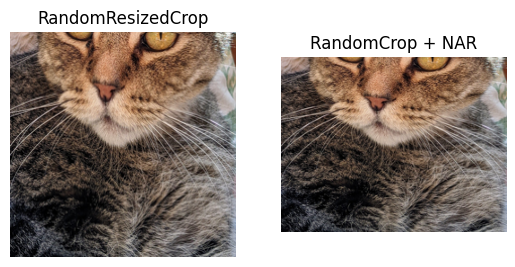

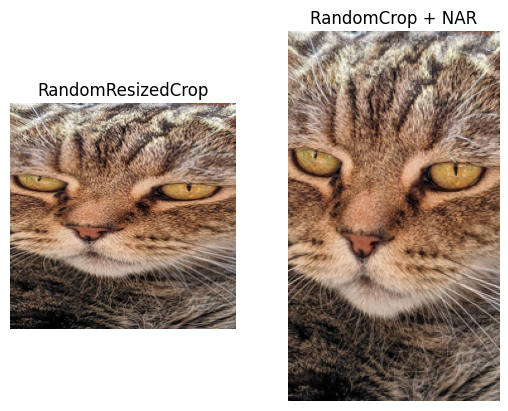

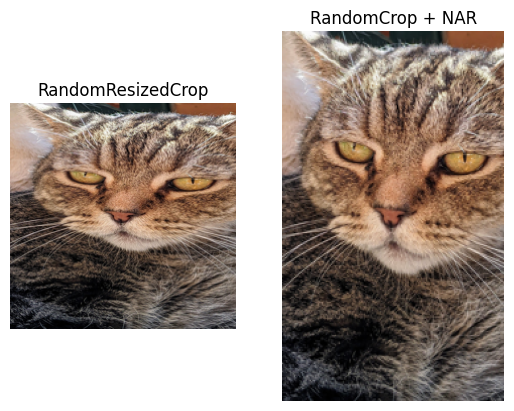

In [10]:
random_resized_crop_transformation = RandomResizedCrop(
    size=224, scale=(0.2, 1.0), ratio=(0.33, 3)
)
random_crop_transformation = RandomCrop(
    scale=(0.2, 1), ratio=(0.33, 3), min_num_pixels=224 * 224
)

for i in range(10):
    # RandomResizedCrop
    tf.random.set_seed(i)
    random_resized = random_resized_crop_transformation(original_image)

    # RandomCrop + NAR
    tf.random.set_seed(i)
    random_crop = random_crop_transformation(original_image)
    random_crop = nar(random_crop)

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title("RandomResizedCrop")
    ax1.imshow(np.clip(random_resized, 0, 1))
    ax1.axis("off")
    ax2.set_title("RandomCrop + NAR")
    ax2.imshow(np.clip(random_crop, 0, 1))
    ax2.axis("off")

# High resolution crops

If the image is high resolution, we can take "aggressive" crops (in which is the scale can be very small). 

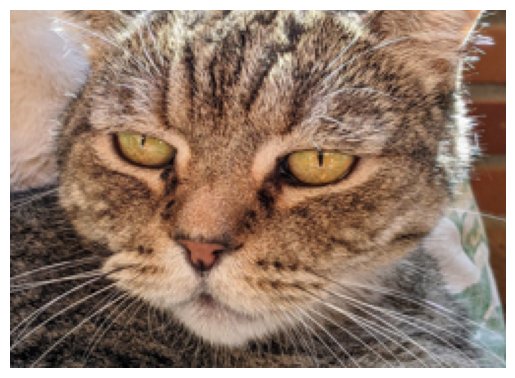

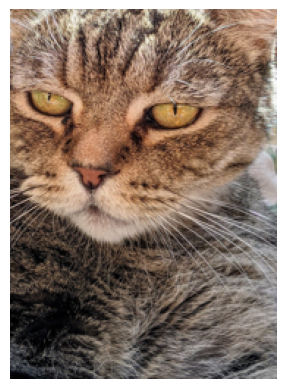

In [13]:
random_crop_transformation = RandomCrop(
    scale=(0.4, 1.0), ratio=(0.5, 1.5), min_num_pixels=224 * 224
)

for i in range(2):
    # RandomResizedCrop
    tf.random.set_seed(i)
    plot_image(nar(random_crop_transformation(original_image)))

If the image is low resolution (as we emulate here), we will not be able to find a crop with $224^2$ pixels, and we will default to the whole image.

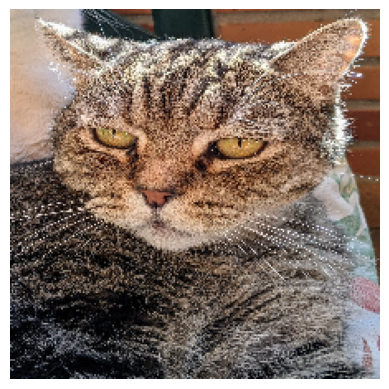

In [22]:
mini_image = tf.image.resize(original_image, (224, 224))
plot_image(mini_image)

Default option!


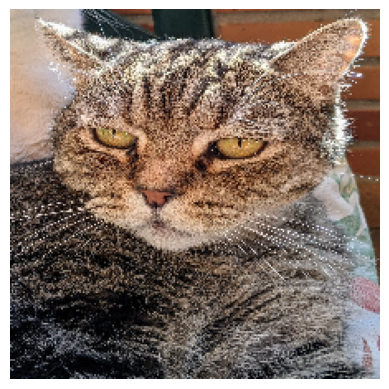

Default option!


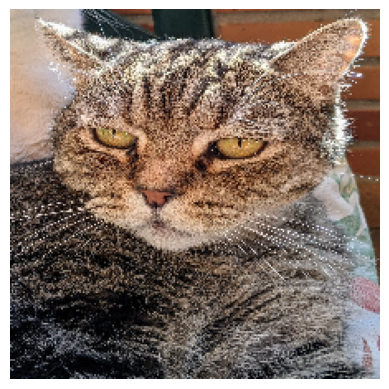

In [23]:
random_crop_transformation = RandomCrop(
    scale=(0.4, 1.0), ratio=(0.5, 1.5), min_num_pixels=224 * 224
)

for i in range(2):
    # RandomResizedCrop
    tf.random.set_seed(i)
    plot_image(nar(random_crop_transformation(mini_image)))